For all spiral galaxies, what is the H$\alpha$ flux as a function of the normalized radius?

For all spiral galaxies, what is the H$\alpha4 flux as a function of the surface brightness?

In [1]:
from astropy.table import QTable, Table, vstack

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

# Data

In [2]:
master_filename = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/DRPall-master_file.txt'

master_table = QTable.read(master_filename, format='ascii.ecsv')

### Keep only spirals

In [3]:
#imc_boolean = master_table['imc'] == 2
#aimc_boolean = np.logical_not(master_table['aimc'] > 0, 
#                              np.logical_and(master_table['aimc'] == 1, 
#                                             master_table['aimc'] == 2))
smooth_boolean = master_table['smoothness_score'] < 2.27

master_spirals = master_table[smooth_boolean]

# H$\alpha$ v. r

In [4]:
all_spiral_data = Table(names=['r_deproj_arcsec_norm', 'Ha_flux'])

<IPython.core.display.Javascript object>


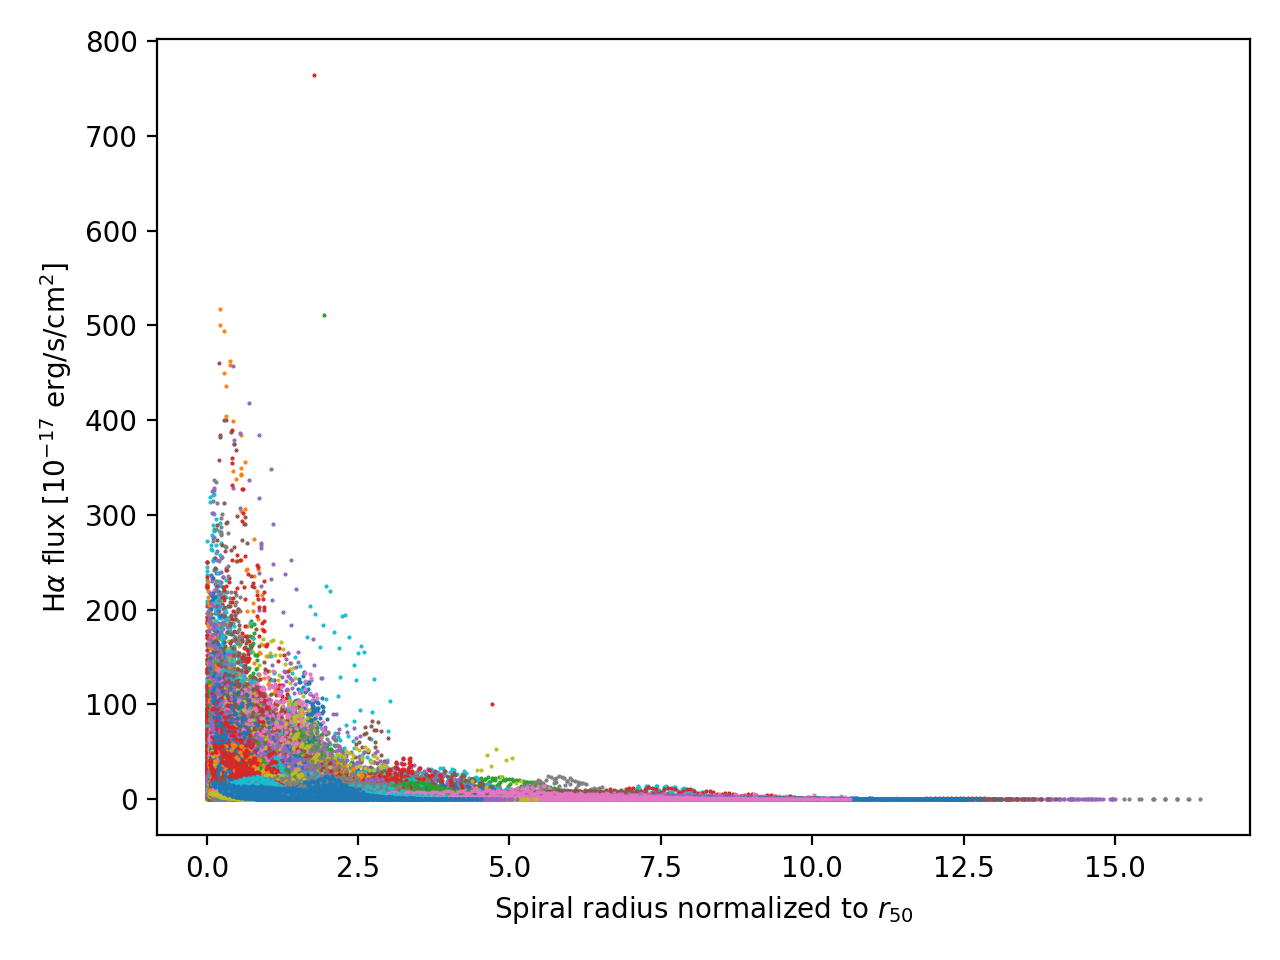

In [5]:
plt.figure()

for i in range(len(master_spirals)):
    
    gal_ID = str(master_spirals['MaNGA_plate'][i]) + '-' \
             + str(master_spirals['MaNGA_IFU'][i])
    
    data_filename = '../HaFlux_data_files/' + gal_ID + '_HaFlux.txt'
    data = Table.read(data_filename, format='ascii.commented_header')
    
    all_spiral_data = vstack([all_spiral_data, data], join_type='inner')
    
    plt.plot(data['r_deproj_arcsec_norm'], data['Ha_flux'], '.', markersize=1)
    
plt.xlabel('Spiral radius normalized to $r_{50}$')
plt.ylabel(r'H$\alpha$ flux [10$^{-17}$ erg/s/cm$^2$]')

#plt.xlim([0,1])
#plt.ylim([0,4])

plt.tight_layout();

#plt.savefig('../figures/Ha_r/spirals.png', format='png', dpi=300);

## How does the flux vary with radius?

In [21]:
Rmax = 10

bin_width = 0.05
n_bins = int(Rmax/bin_width)

radii_bins = np.linspace(bin_width, Rmax, n_bins)

bin_indices = np.digitize(all_spiral_data['r_deproj_arcsec_norm'], radii_bins)

medians = np.zeros(n_bins)
std_dev = np.zeros(n_bins)

for i in range(n_bins):
    bin_boolean = bin_indices == i
    
    Ha_flux_bin_values = all_spiral_data['Ha_flux'][bin_boolean]
    
    medians[i] = np.nanmedian(Ha_flux_bin_values)
    std_dev[i] = np.nanstd(Ha_flux_bin_values)

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Warning: converting a masked element to nan.


## Where does the median H$\alpha$ flux go to 0?

In [25]:
indices = np.where(medians == 0)

radii_bins[indices[0][0]]

1.75

In [22]:
plt.figure()

plt.semilogy(all_spiral_data['r_deproj_arcsec_norm'], 
             all_spiral_data['Ha_flux'], 
             '.', markersize=1, alpha=0.1)
plt.semilogy(radii_bins, medians, 'orange')
plt.fill_between(radii_bins, medians - std_dev, medians + std_dev, alpha=0.5, color='orange')

plt.xlabel('Elliptical radius normalized to $r_{50}$')
plt.ylabel(r'H$\alpha$ flux [10$^{-17}$ erg/s/cm$^2$]')

#plt.xlim([0,1])
plt.ylim([1e-4,1000])

plt.tight_layout();

#plt.savefig('../figures/veldisp_r/ellipticals_median.png', format='png', dpi=300);

<IPython.core.display.Javascript object>

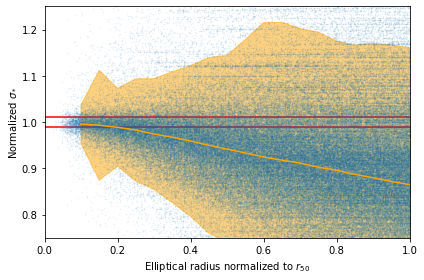

In [70]:
plt.figure()

plt.plot(all_spiral_data['r_deproj_arcsec_norm'], 
         all_spiral_data['Ha_flux'], 
         '.', markersize=1, alpha=0.1)
plt.plot(radii_bins, medians, 'orange')
plt.fill_between(radii_bins, medians - std_dev, medians + std_dev, alpha=0.5, color='orange')
#plt.hlines([1.01, 0.99], 0, 1, colors='r')

plt.xlabel('Elliptical radius normalized to $r_{50}$')
plt.ylabel(r'H$\alpha$ flux [10$^{-17}$ erg/s/cm$^2$]')

#plt.xlim([0,1])
#plt.ylim([0.75,1.25])

plt.tight_layout();

#plt.savefig('../figures/veldisp_r/ellipticals_median_0p01.png', format='png', dpi=300);

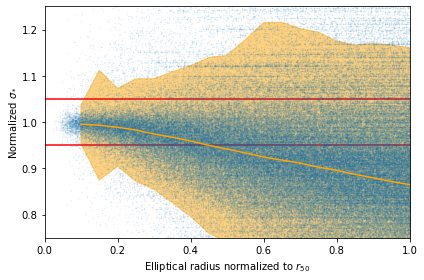

In [72]:
plt.figure()

plt.plot(all_spiral_data['r_deproj_arcsec_norm'], 
         all_spiral_data['Ha_flux'], 
         '.', markersize=1, alpha=0.1)
plt.plot(radii_bins, medians, 'orange')
plt.fill_between(radii_bins, medians - std_dev, medians + std_dev, alpha=0.5, color='orange')
#plt.hlines([1.05, 0.95], 0, 1, colors='r')

plt.xlabel('Elliptical radius normalized to $r_{50}$')
plt.ylabel(r'H$\alpha$ flux [10$^{-17}$ erg/s/cm$^2$]')

#plt.xlim([0,1])
#plt.ylim([0.75,1.25])

plt.tight_layout();

#plt.savefig('../figures/veldisp_r/ellipticals_median_0p05.png', format='png', dpi=300);

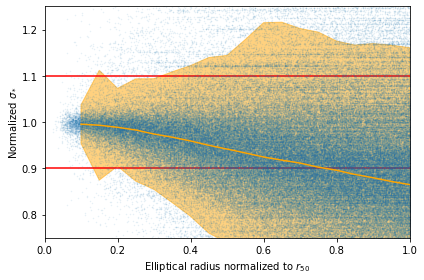

In [71]:
plt.figure()

plt.plot(all_spiral_data['r_deproj_arcsec_norm'], 
         all_spiral_data['Ha_flux'], 
         '.', markersize=1, alpha=0.1)
plt.plot(radii_bins, medians, 'orange')
plt.fill_between(radii_bins, medians - std_dev, medians + std_dev, alpha=0.5, color='orange')
#plt.hlines([1.1, 0.9], 0, 1, colors='r')

plt.xlabel('Elliptical radius normalized to $r_{50}$')
plt.ylabel(r'H$\alpha$ flux [10$^{-17}$ erg/s/cm$^2$]')

#plt.xlim([0,1])
#plt.ylim([0.75,1.25])

plt.tight_layout();

#plt.savefig('../figures/veldisp_r/ellipticals_median_0p1.png', format='png', dpi=300);

# H$\alpha$ v. surface brightness

In [4]:
all_spiral_data = Table(names=['r_flux', 'Ha_flux'])

<IPython.core.display.Javascript object>


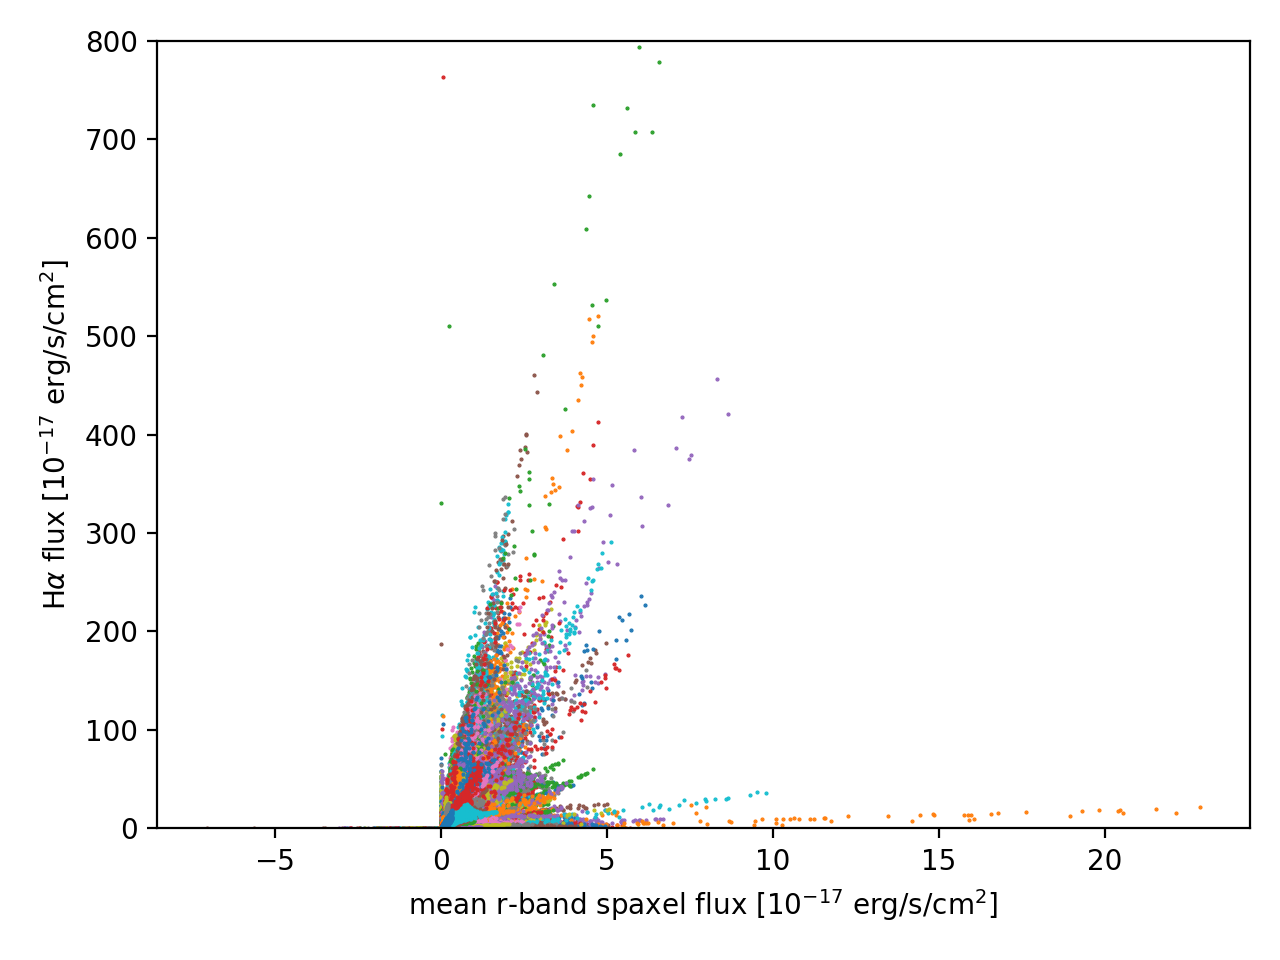

In [6]:
plt.figure()

for i in range(len(master_spirals)):
    
    gal_ID = str(master_spirals['MaNGA_plate'][i]) + '-' \
             + str(master_spirals['MaNGA_IFU'][i])
    
    data_filename = '../HaFlux_data_files/' + gal_ID + '_HaFlux.txt'
    data = Table.read(data_filename, format='ascii.commented_header')
    
    all_spiral_data = vstack([all_spiral_data, data], join_type='inner')
    
    plt.plot(data['r_flux'], data['Ha_flux'], '.', markersize=1)
    
plt.xlabel(r'mean r-band spaxel flux [10$^{-17}$ erg/s/cm$^2$]')
plt.ylabel(r'H$\alpha$ flux [10$^{-17}$ erg/s/cm$^2$]')

#plt.xlim([0,1])
plt.ylim([0,800])

plt.tight_layout();

#plt.savefig('../figures/Ha_r/spirals.png', format='png', dpi=300);